In [41]:
# load in data file from local device
from google.colab import files
uploaded = files.upload()

Saving reached_16_80.csv to reached_16_80 (1).csv


In [29]:
# import relevant packages
import pandas as pd
import numpy as np
import io

# read in uploaded csv data to a pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['reached_16_40.csv']))
df

,PROFILE_ID,REACHED_16_EVENTS,REACHED_40_EVENTS,RECENT_LAST_EVENT,EVENT_CYCLES_F16,DISTINCT_ARTICLES_F16,PERCENT_GOOGLE_ARTICLES_F16,PERCENT_ARTICLE_CONTENT_F16,AVERAGE_CONTENT_SCORE_F16,DAYS_TO_16_EVENTS
0,Hu6YEoQBwWEOklUH86dq,1,0,0,2,4,0.000000,1.00,0.000000,5.0
1,5mbH54MBu9aDgDX16zdA,1,0,0,2,3,0.666667,1.00,0.000000,10.0
2,EP-czIMBGoM3uBpFQ0oj,1,0,0,1,1,0.000000,1.00,0.000000,4.0
3,SNBcwYQBRkWobPtwF6c-,1,0,0,1,1,0.000000,1.00,0.000000,2.0
4,ShEI9YUBwWEOklUHlWrO,1,1,0,1,1,0.000000,1.00,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...
118094,UzSLOIQBwWEOklUHD2bP,1,0,0,2,3,1.000000,1.00,0.000000,76.0
118095,5teRZ4MB28LFeUkX1JFw,1,1,0,4,3,0.666667,1.00,0.000000,42.0
118096,m5cPi4MB28LFeUkXIjm1,1,0,0,3,3,0.666667,1.00,0.000000,39.0
118097,oxeX34EBuqp2E9ofwqqF,1,0,0,3,7,1.000000,1.00,0.000000,17.0


In [30]:
# extract relevant columns of the data and their corresponding labels
data = df[['EVENT_CYCLES_F16','DISTINCT_ARTICLES_F16','PERCENT_GOOGLE_ARTICLES_F16','PERCENT_ARTICLE_CONTENT_F16','DAYS_TO_16_EVENTS']]
labels = df[['REACHED_40_EVENTS']]
features = data.columns
data

,EVENT_CYCLES_F16,DISTINCT_ARTICLES_F16,PERCENT_GOOGLE_ARTICLES_F16,PERCENT_ARTICLE_CONTENT_F16,DAYS_TO_16_EVENTS
0,2,4,0.000000,1.00,5.0
1,2,3,0.666667,1.00,10.0
2,1,1,0.000000,1.00,4.0
3,1,1,0.000000,1.00,2.0
4,1,1,0.000000,1.00,6.0
...,...,...,...,...,...
118094,2,3,1.000000,1.00,76.0
118095,4,3,0.666667,1.00,42.0
118096,3,3,0.666667,1.00,39.0
118097,3,7,1.000000,1.00,17.0


In [32]:
# calculate the proportion of data labeled as 1
sum(labels['REACHED_40_EVENTS'])/len(labels['REACHED_40_EVENTS'])

0.25040008806171093

In [33]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
data = scaler.fit_transform(data)

data

array([[-0.18592013,  1.03742552, -0.7642952 ,  0.58119883, -0.65219289],
       [-0.18592013,  0.38639058,  0.95002473,  0.58119883, -0.52960893],
       [-1.0002576 , -0.91567931, -0.7642952 ,  0.58119883, -0.67670968],
       ...,
       [ 0.62841734,  0.38639058,  0.95002473,  0.58119883,  0.18137805],
       [ 0.62841734,  2.99053035,  1.80718341,  0.58119883, -0.35799138],
       [ 3.88576721, -0.91567931, -0.7642952 , -1.88795114,  0.54912994]])

In [34]:
from sklearn.model_selection import train_test_split

# perform training-validation split on the data
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=82113)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(94479, 5) (23620, 5) (94479, 1) (23620, 1)


0.018132376039589868
-0.006057029202873198

0.0790136746651037
-0.026394121422802695

-0.07155136593477238
0.023901374647543768

-0.10204775472210488
0.03408854024921284

-0.15544762201369006
0.05192649788413526



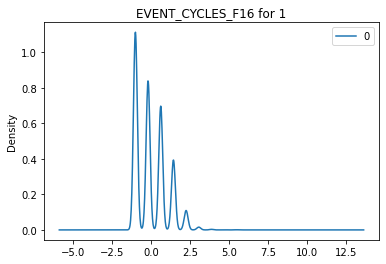

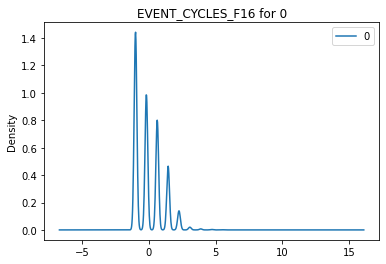

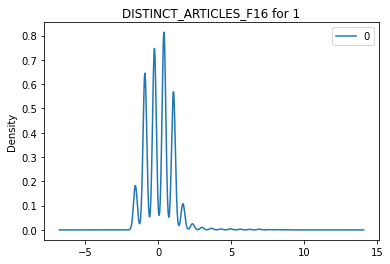

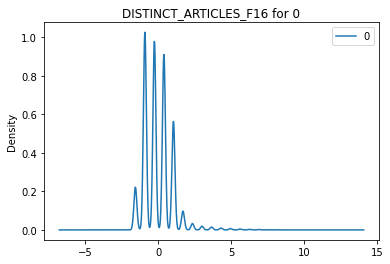

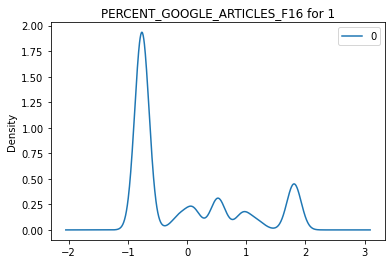

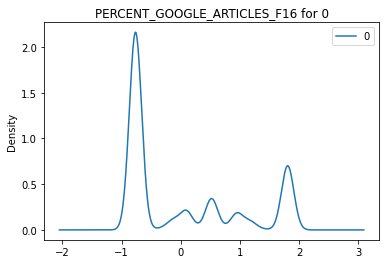

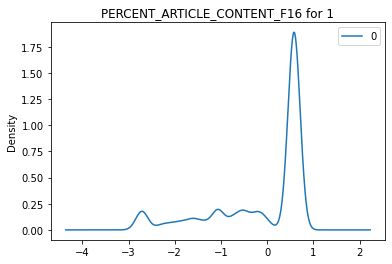

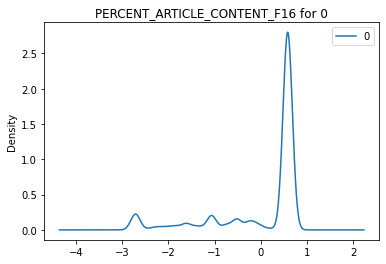

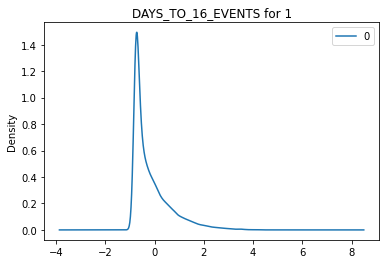

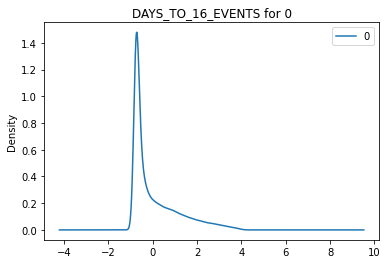

In [36]:
# loop through each feature
for i in range(data.shape[1]):
  # plot the class conditional density
  pd.DataFrame(data[labels['REACHED_40_EVENTS'] == 1,i]).plot.kde(title = f'{features[i]} for 1')
  pd.DataFrame(data[labels['REACHED_40_EVENTS'] == 0,i]).plot.kde(title = f'{features[i]} for 0')
  # print the class conditional mean
  print(data[labels['REACHED_40_EVENTS'] == 1,i].mean())
  print(data[labels['REACHED_40_EVENTS'] == 0,i].mean())
  print()


In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

# define the weight initializer
init = tf.keras.initializers.GlorotNormal()

# define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=data.shape[1], activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init)
])

# compile the model using the appropriate loss function and optimizer
model.compile(
    loss='binary_crossentropy', 
    optimizer="adam", 
    metrics=['accuracy']
)

# define a training function
def plot_training(model, num_epochs = 25):
  history = model.fit(
    X_train, y_train,
    verbose=0, 
    epochs=num_epochs, 
    batch_size=32,
    validation_data = (X_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, 
                                                verbose=0, restore_best_weights=True)]
  )

  _, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
  print('Train: %.2f, Test: %.2f' % (train_accuracy, test_accuracy))

  # plot the training performance metrics
  plt.plot(history.history['accuracy'], label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [16]:
# train the model
plot_training(model)

KeyboardInterrupt: ignored

In [38]:
from sklearn.cluster import KMeans

# perform k-means clustering
kmeans = KMeans(n_clusters=2).fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# output the resulting labels
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [39]:
# calculate the proportion of k-means labels that are 1
sum(kmeans.labels_)/len(kmeans.labels_)

0.3827043412729998

0.9780831860525683
-0.606381522592219

0.4548402137365265
-0.28198695701420806

0.32350882213622173
-0.20056552953404289

0.3378078016363605
-0.20943045747110647

0.9202053722416494
-0.5704990563935946



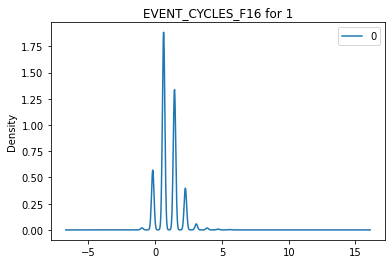

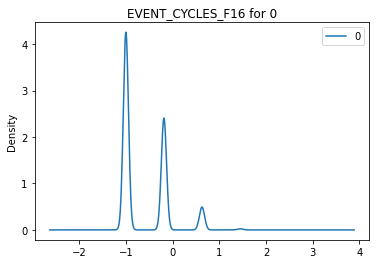

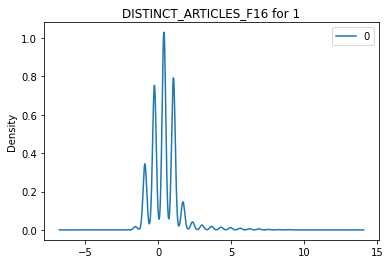

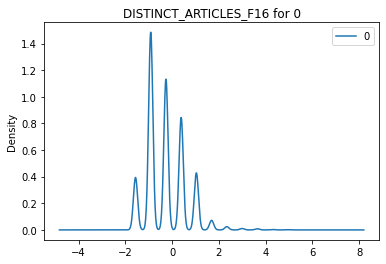

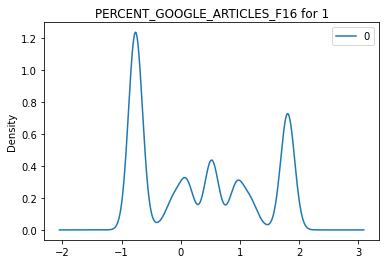

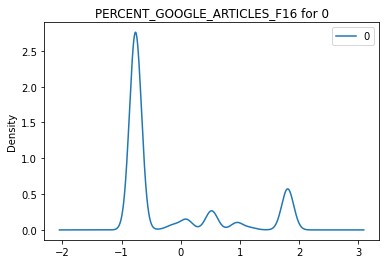

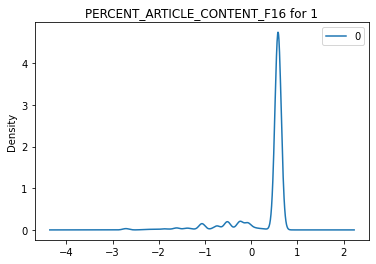

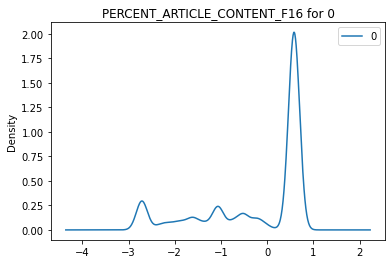

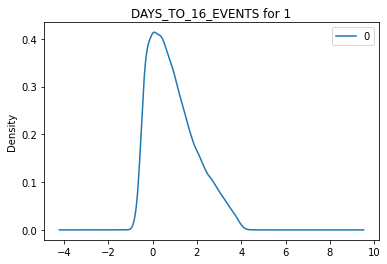

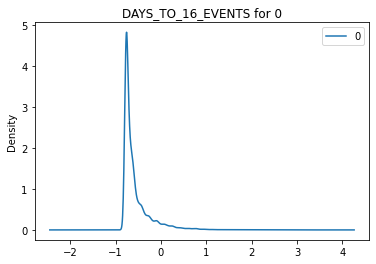

In [40]:
# loop through each feature
for i in range(data.shape[1]):
  # plot the class conditional density
  pd.DataFrame(data[kmeans.labels_ == 1,i]).plot.kde(title = f'{features[i]} for 1')
  pd.DataFrame(data[kmeans.labels_ == 0,i]).plot.kde(title = f'{features[i]} for 0')
  # print the class conditional mean
  print(data[kmeans.labels_ == 1,i].mean())
  print(data[kmeans.labels_ == 0,i].mean())
  print()

In [22]:
from sklearn.model_selection import train_test_split

# perform training-validation split on the data (using new labels)
X_train, X_valid, y_train, y_valid = train_test_split(data, kmeans.labels_, test_size=0.2, random_state=82113)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(90691, 4) (22673, 4) (90691,) (22673,)


Train: 1.00, Test: 1.00


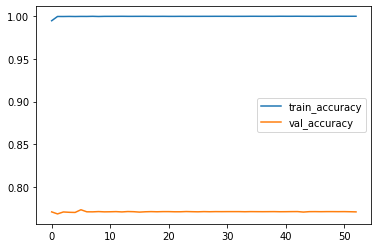

In [23]:
# define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=data.shape[1], activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init)
])

# compile the model using the appropriate loss function and optimizer
model.compile(
    loss='binary_crossentropy', 
    optimizer="adam", 
    metrics=['accuracy']
)

# train the model
plot_training(model)

proportion labeled zero by k-means that is zero

In [24]:
sum((kmeans.labels_ == 0) & (labels['REACHED_80_EVENTS'] == 0))/sum(kmeans.labels_ == 0)

0.9266585115445947

proportion labeled one by k-means that is one

In [25]:
sum((kmeans.labels_ == 1) & (labels['REACHED_80_EVENTS'] == 1))/sum(kmeans.labels_ == 1)

0.10529212143446758

proportion zero labeled zero by k-means

In [26]:
sum((kmeans.labels_ == 0) & (labels['REACHED_80_EVENTS'] == 0))/sum(labels['REACHED_80_EVENTS'] == 0)

0.8130384368441731

proportion one labeled one by k-means

In [27]:
sum((kmeans.labels_ == 1) & (labels['REACHED_80_EVENTS'] == 1))/sum(labels['REACHED_80_EVENTS'] == 1)

0.25479968926867164